In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
df=pd.read_csv(r"/kaggle/input/iris-flower-dataset/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


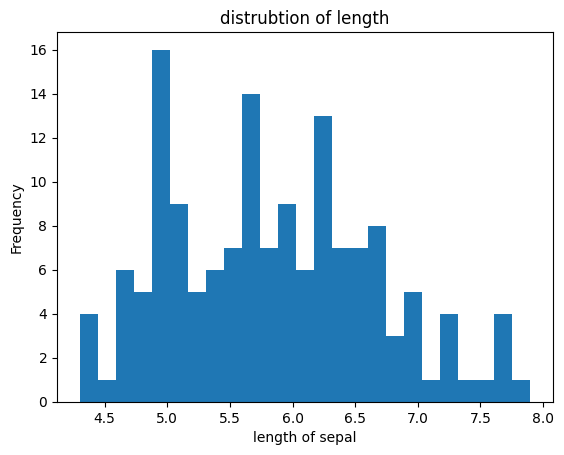

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
df['sepal_length'].plot(kind="hist",bins=25)
plt.xlabel("length of sepal")
plt.title("distrubtion of length");

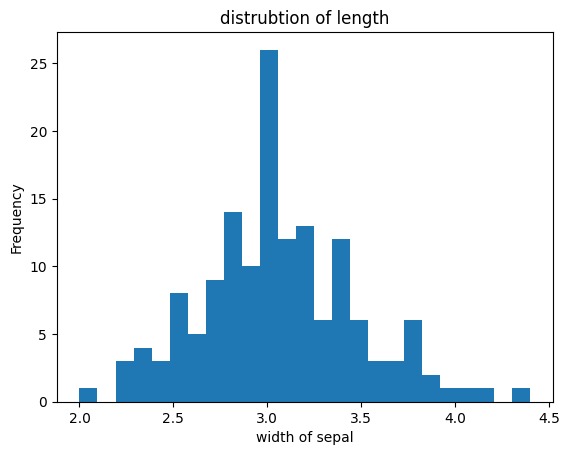

In [7]:
df['sepal_width'].plot(kind="hist",bins=25)
plt.xlabel("width of sepal")
plt.title("distrubtion of length");

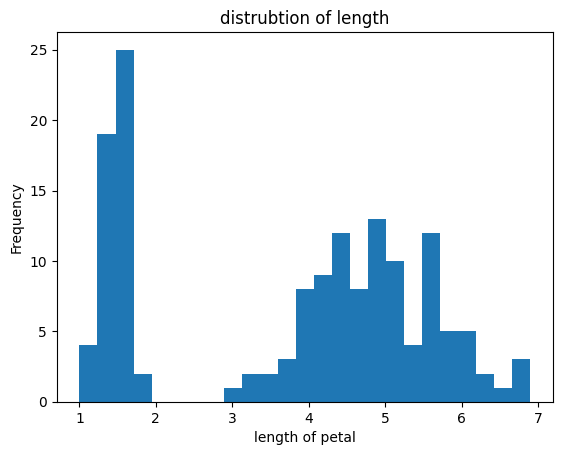

In [8]:
df['petal_length'].plot(kind="hist",bins=25)
plt.xlabel("length of petal")
plt.title("distrubtion of length");

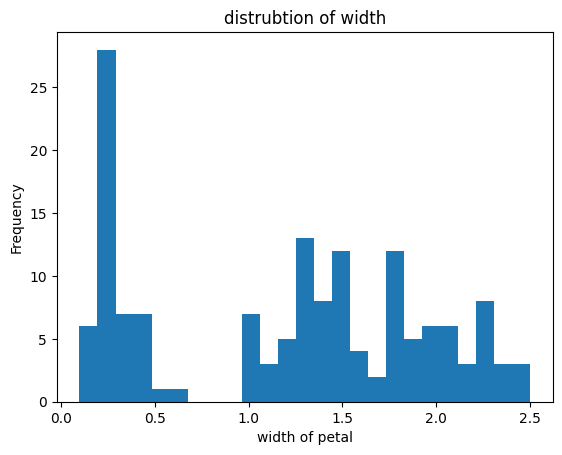

In [9]:
df['petal_width'].plot(kind="hist",bins=25)
plt.xlabel("width of petal")
plt.title("distrubtion of width");

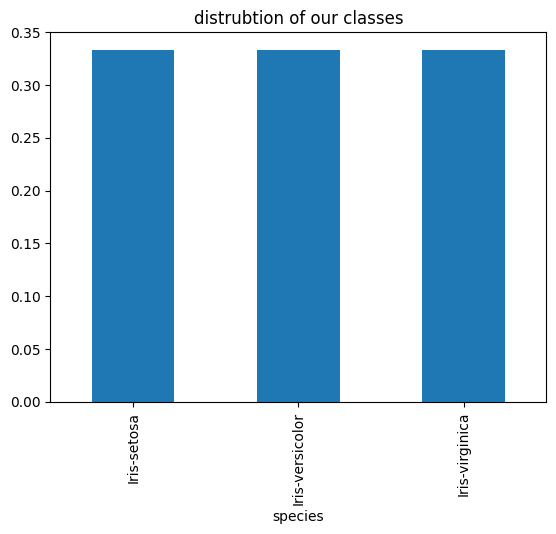

In [10]:
df['species'].value_counts(normalize=True).plot(kind="bar")
plt.title("distrubtion of our classes");

In [11]:
from sklearn.cluster import KMeans

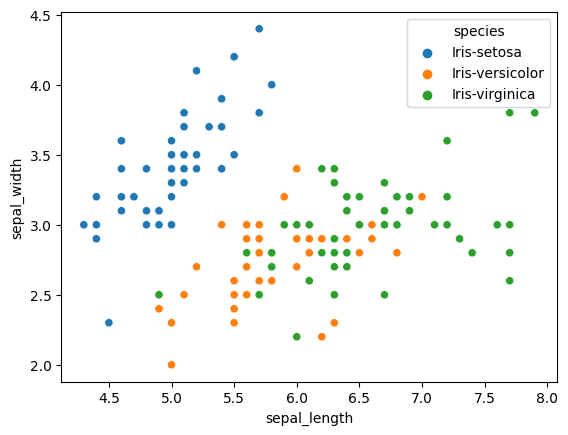

In [12]:
sns.scatterplot(x=df['sepal_length'],y=df['sepal_width'],hue=df['species']);

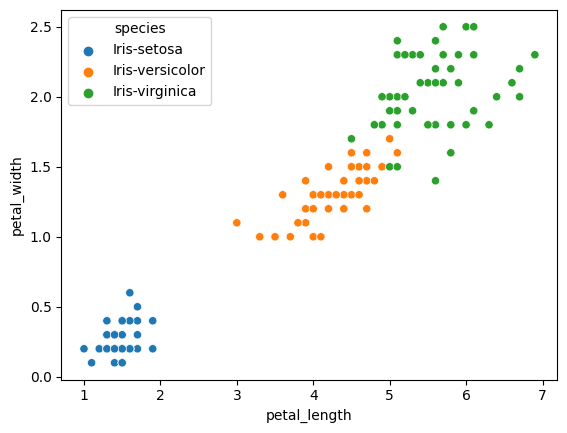

In [13]:
sns.scatterplot(x=df['petal_length'],y=df['petal_width'],hue=df['species']);

as we see  versictor and varginia are close to each other

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

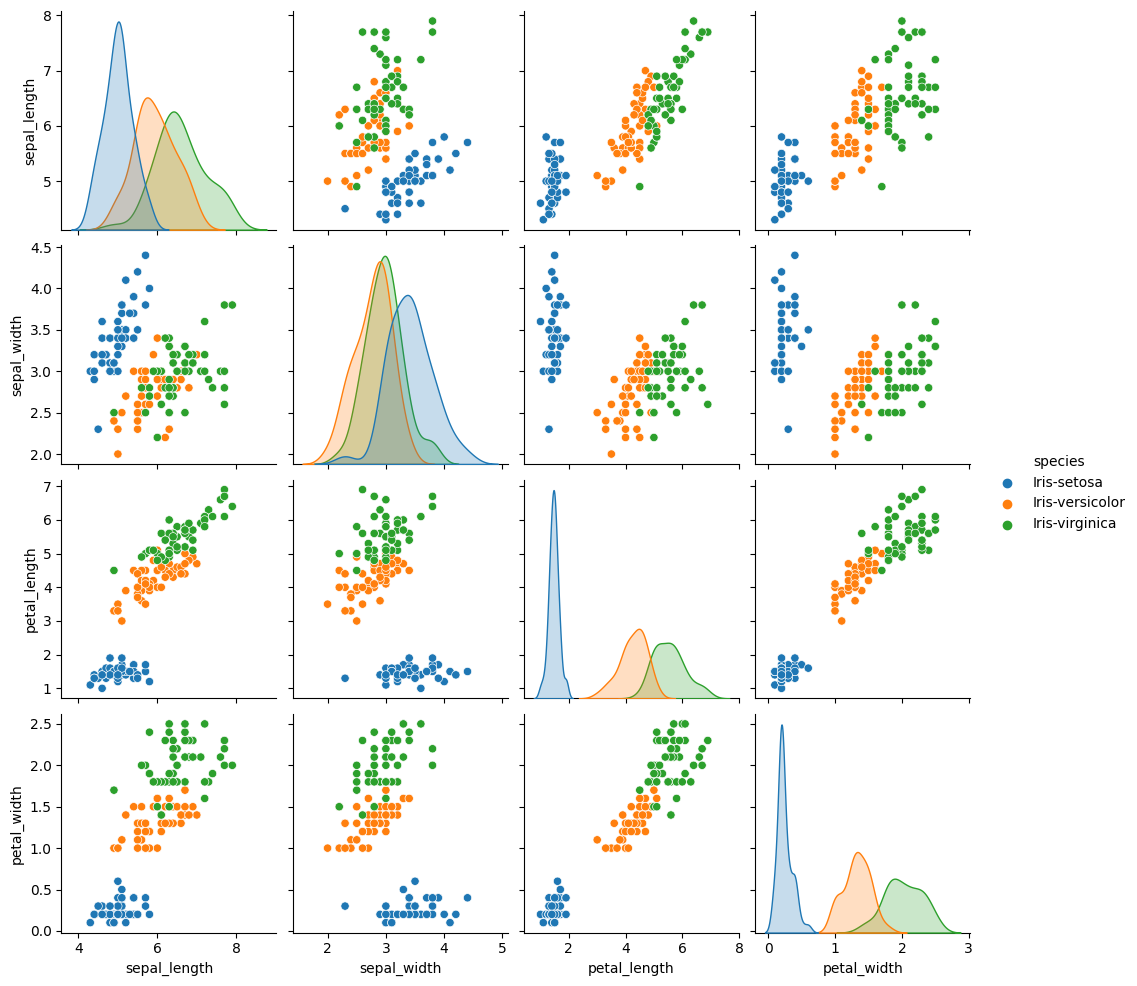

In [14]:
sns.pairplot(data=df,hue='species');

In [15]:
X=df.drop(columns=['species'])

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

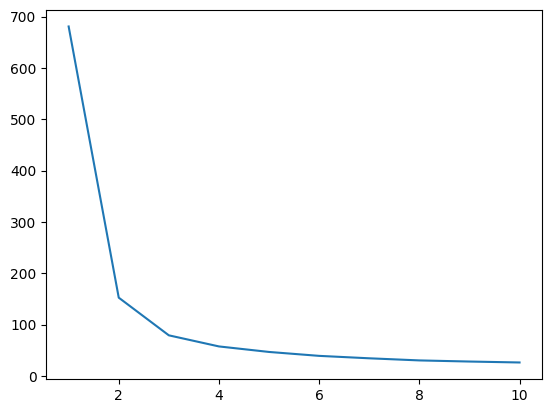

In [16]:
error=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i,random_state=0).fit(X)
    kmean.fit(X)
    error.append(kmean.inertia_)
plt.plot(range(1,11),error)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y=lb.fit_transform(df['species'])
X=df.drop(columns=['species'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=KMeans(n_clusters=3,random_state=42)
model.fit(X_train,y_train)
predict=model.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,predict)
print(accuracy_score(y_test,predict))
print(accuracy_score(y_train,model.predict(X_train)))

0.36666666666666664
0.4666666666666667
